# Image segmentation with StarDist

StarDist is a deep-learning based image segmentation method for segmenting objects such as cell nuclei.

## Installation
In order to run the code in this notebook, you need to [install stardist](https://github.com/stardist/stardist#Installation). In very short, that means running the following commands from command line in your conda environment:
```
conda install tensorflow
pip install stardist
```

See also
* [StarDist in Proceedings of MICCAI 2018](https://link.springer.com/chapter/10.1007/978-3-030-00934-2_30)
* [StarDist on github](https://github.com/stardist/stardist)
* [StarDist NEUBIAS Academy webinar](https://www.youtube.com/watch?v=Amn_eHRGX5M)
* [StarDist prediction example](https://github.com/stardist/stardist/blob/master/examples/2D/3_prediction.ipynb)

As usual, we start by loading an example image.

In [1]:
from skimage.io import imread, imshow
X = imread('https://samples.fiji.sc/blobs.png')

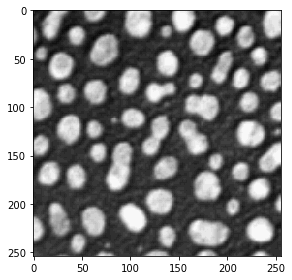

In [2]:
imshow(X)

## Loading a model
Models are files that typically contain a neural network which is capable of segmenting an image. StarDist comes with some pretrained models for demonstrating how the algorithm performs on a general use-case such as nuclei segmentation. If such a pretrained model does not perform well on your data (be a good scientist and check that carefully!), you need to [train your own model](https://github.com/stardist/stardist/blob/master/examples/2D/2_training.ipynb) which fits to your data. For training, you will likely need a powerful GPU, for applying a model (prediction step) to a 2D image no GPU is necessary.

In [3]:
from stardist.models import StarDist2D 

# creates a pretrained model
model = StarDist2D.from_pretrained('2D_versatile_fluo')

Found model '2D_versatile_fluo' for 'StarDist2D'.
5324800/5320433 [==============================] - 1s 0us/step
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


## Normalizing the input image
Many algorithms using neural networks need normalized input data to work on. For example, you can determine the 1% and the 99.8% percentile (that's very commond) and normalize your image so that the intensities spread between these percentiles are afterwards in the range between 0 and 1. We need to do this because the model was trained on an image in this range and might not be able to segment images with different intensity ranges.

In [4]:
from csbdeep.utils import normalize

axis_norm = (0,1)
image = normalize(X, 1,99.8, axis=axis_norm)

Segmenting the image and labeling the individual objects is often called "instance segmentation" or "prediction" in the artificial intelligence community.

matplotlib_plugin.py (150): Low image data range; displaying image with stretched contrast.


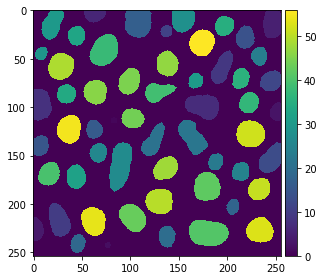

In [5]:
labels, details = model.predict_instances(image)

imshow(labels)

## Result visualization
Cell / nuclei segmentation results can be checked best if the resulting label image is overlaid to the original image

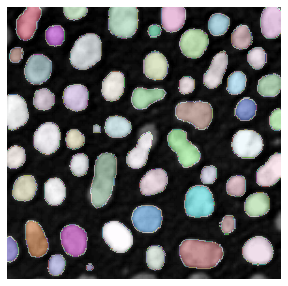

In [6]:
import matplotlib.pyplot as plt
from stardist import random_label_cmap
plt.figure(figsize=(5,5))
plt.imshow(image, clim=(0,1), cmap='gray')
plt.imshow(labels, cmap=random_label_cmap(), alpha=0.5)
plt.axis('off');

... or by drawing outlines around segmented regions.

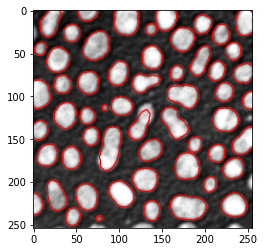

In [7]:
import matplotlib.pyplot as plt

# create a new plot
fig, axes = plt.subplots(1,1)

# add two images
axes.imshow(image, cmap=plt.cm.gray)
axes.contour(labels, [0.5], linewidths=1.2, colors='r')

Note: The model we applied here to blobs.gif was not trained on it. The result doesn't look so bad though.

## More available pretrained models

StarDist offers more available pretrained models.

In [8]:
# prints a list of available models 
StarDist2D.from_pretrained() 

There are 4 registered models for 'StarDist2D':

Name                  Alias(es)
────                  ─────────
'2D_versatile_fluo'   'Versatile (fluorescent nuclei)'
'2D_versatile_he'     'Versatile (H&E nuclei)'
'2D_paper_dsb2018'    'DSB 2018 (from StarDist 2D paper)'
'2D_demo'             None
